In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Set the path to the CSV file
data_path = '/content/drive/My Drive/Colab Notebooks/insurance.csv'

In [26]:
import pandas as pd

# Load the dataset from Google Drive
data = pd.read_csv(data_path)

# Show the first few rows of the dataset
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [27]:
# Display data types of each column
print(data.dtypes)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [28]:
#train test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2)

In [29]:
train_data

,age,sex,bmi,children,smoker,region,charges
629,44,female,38.950,0,yes,northwest,42983.45850
615,47,female,36.630,1,yes,southeast,42969.85270
276,19,male,20.615,2,no,northwest,2803.69785
801,64,female,35.970,0,no,southeast,14313.84630
746,34,male,27.000,2,no,southwest,11737.84884
...,...,...,...,...,...,...,...
765,57,female,31.825,0,no,northwest,11842.62375
739,29,male,35.500,2,yes,southwest,44585.45587
162,54,male,39.600,1,no,southwest,10450.55200
890,64,female,26.885,0,yes,northwest,29330.98315


In [30]:
for col, dtype in data.dtypes.items():
    if dtype in ['int64', 'float64']:
        num_cols.append(col)
    elif dtype == 'object':
        cat_cols.append(col)

# Print out the lists for verification
print("Numeric Columns and Target:")
print(num_cols)

print("Categorical Columns:")
print(cat_cols)

Numeric Columns and Target:
['age', 'bmi', 'children', 'charges']
Categorical Columns:
['sex', 'smoker', 'region']


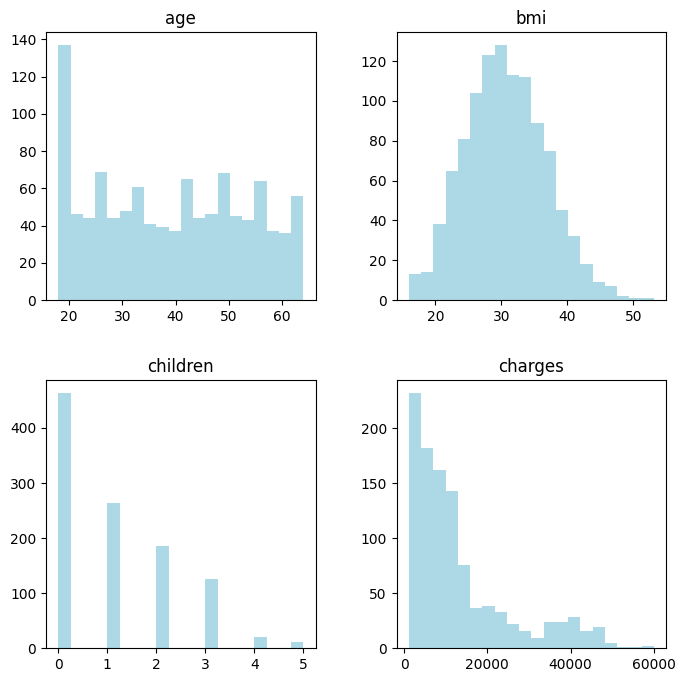

In [31]:
import matplotlib.pyplot as plt
train_data[num_cols].hist(bins=20, figsize=(8,8), color='lightblue', grid=False)
plt.show()

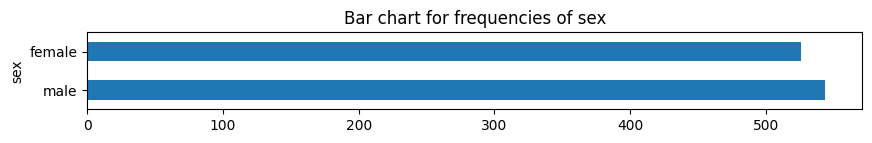

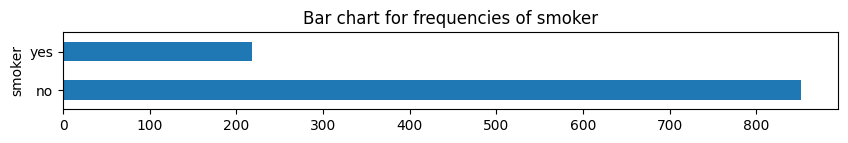

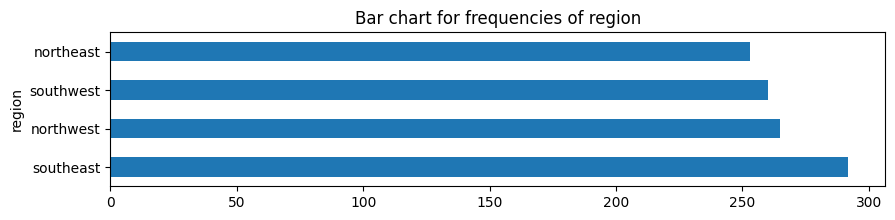

In [32]:
for col in cat_cols:
    freq_table = train_data[col].value_counts()
    plt.figure(figsize = (10,len(freq_table)*0.5)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

In [33]:
num_cols = ['age', 'bmi', 'children']  # Numeric features that are symmetric
log_cols = ['charges']                 # Numeric features that are skewed
cat_cols = ['sex', 'smoker', 'region']  # Categorical features
target = 'charges'                     # Target variable

# Printing to verify
print("Numeric Columns:", num_cols)
print("Log Columns:", log_cols)
print("Categorical Columns:", cat_cols)
print("Target Column:", target)

Numeric Columns: ['age', 'bmi', 'children']
Log Columns: ['charges']
Categorical Columns: ['sex', 'smoker', 'region']
Target Column: charges


In [34]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.01)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

processing_pipeline.fit(train_data)                            #train the pipeline
trainX = processing_pipeline.transform(train_data)             #generate the training features
trainY = train_data[target]                                    #generate the training target
testX = processing_pipeline.transform(test_data)               #generate the testing features
testY = test_data[target]                                      #generate the testing features

In [35]:
import joblib
# Define the path where you want to save the pipeline
pipeline_save_path = '/content/drive/My Drive/Colab Notebooks/processing_pipeline.pkl'
joblib.dump(processing_pipeline, pipeline_save_path)

['/content/drive/My Drive/Colab Notebooks/processing_pipeline.pkl']

In [36]:
num_layers = 5
num_iters = 500
learning_rate = 0.001

In [38]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


neural_net = Sequential()
neural_net.add(Dense(trainX.shape[1], activation='relu', input_shape=(trainX.shape[1],)))
for _ in range(num_layers - 1):  # Adjusting for the first layer already added
    neural_net.add(Dense(trainX.shape[1], activation='relu'))
neural_net.add(Dense(1))

neural_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse')
neural_net.fit(trainX, trainY, epochs=num_iters, batch_size=int(trainX.shape[0] // 10), validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 306148480.0000 - val_loss: 381331104.0000
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 317408672.0000 - val_loss: 381329440.0000
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 291683744.0000 - val_loss: 381327424.0000
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 325206016.0000 - val_loss: 381324416.0000
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 304085408.0000 - val_loss: 381319712.0000
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 315629152.0000 - val_loss: 381312672.0000
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 292720416.0000 - val_loss: 381301984.0000
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 303313664.0000 - val_loss: 381286048.0000
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 315747008.0000 - val_loss: 381262656.0000
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 294079744.0000 - val_loss: 381227648.0000

In [43]:
mse = neural_net.evaluate(testX, testY)

# Calculate RMSE from the MSE
rmse = np.sqrt(mse)

# Printing both MSE and RMSE for reference
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 560771.0000 
Mean Squared Error (MSE): 992963.3125
Root Mean Squared Error (RMSE): 996.4754450060473


In [50]:
model_save_path = '/content/drive/My Drive/Colab Notebooks/trained_model.keras'
neural_net.save(model_save_path)

print(f'Model saved to {model_save_path}')

Model saved to /content/drive/My Drive/Colab Notebooks/trained_model.keras
